In [30]:
import numpy as np
import pandas as pd
import scipy as sp
import scanpy as sc
import anndata as ad
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.pyplot import rc_context
import os
import seaborn as sns
import importlib
import re

In [67]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150, facecolor='white', dpi_save=900)

scanpy==1.9.3 anndata==0.10.8 umap==0.5.3 numpy==1.23.5 scipy==1.11.4 pandas==2.2.1 scikit-learn==1.5.1 statsmodels==0.14.2 python-igraph==0.11.6 louvain==0.8.0 pynndescent==0.5.12


In [68]:
# sns.set_theme(style="c")
# sns.set_theme(style="whitegrid", palette='tab10')
sns.set_theme(style="white", palette='deep')

---

In [4]:
!pwd

/data/tcl/Project/ADFCA/script2/GitHub_cell/2020_natureMedicine_TREM2_5xFAD


### Load all files

In [6]:
# allMatrixFolder='cellrangerSummary/allMatrix'
# allDecontxFolder=f'Analysis/1.decontx_delta/decontX_outs1'
# allSoupxFolder=f'Analysis/1.soupx/soupX_outs'
# cellbenderFolder = f'Analysis/1.cellbender'
# allCellbenderFolder=f'{cellbenderFolder}/cellbender_outs_h5'
# scarFolder = f'Analysis/1.scar'

In [39]:
figureFolder = '/data/tcl/Project/ADFCA/Analysis/Figure'
os.makedirs(figureFolder, exist_ok=True)

In [40]:
figure4Folder=f'{figureFolder}/Figure4'
os.makedirs(figure4Folder, exist_ok=True)
figure4PicFolder=f'{figure4Folder}/pic'
os.makedirs(figure4PicFolder, exist_ok=True)

In [41]:
dataName = '2020_natureMedicine_TREM2_5xFAD'
nm2020_Folder=f'{figure4Folder}/{dataName}'
os.makedirs(nm2020_Folder, exist_ok=True)
nm2020_PicFolder=f'{nm2020_Folder}/pic'
os.makedirs(nm2020_PicFolder, exist_ok=True)

In [42]:
nm2020_Folder

'/data/tcl/Project/ADFCA/Analysis/Figure/Figure7/2020_natureMedicine_TREM2_5xFAD'

In [11]:
rawDataFolder=f'/data/tcl/dataset/mouseAtlas/2020_natureMedicine_TREM2_5xFAD'

In [46]:
# scDblFinderFolder='Analysis/2.scDblFinder_HT'
scDblFinderFolder='/data/tcl/Project/ADFCA/Analysis/Figure/Figure4/2020_natureMedicine_TREM2_5xFAD/2.scDblFinder'
os.makedirs(scDblFinderFolder, exist_ok=True)
picFolderPath=f'{scDblFinderFolder}/pic'
os.makedirs(picFolderPath, exist_ok=True)
barcodeNoDoubletFolder=f'{scDblFinderFolder}/barcodeNoDoublet'
os.makedirs(barcodeNoDoubletFolder, exist_ok=True)
metadataFolder=f'{scDblFinderFolder}/metadata'
os.makedirs(metadataFolder, exist_ok=True)

In [47]:
metadataFolder

'/data/tcl/Project/ADFCA/Analysis/Figure/Figure7/2020_natureMedicine_TREM2_5xFAD/2.scDblFinder/metadata'

In [13]:
sample_Df = pd.read_csv(f'{rawDataFolder}/SraRunTable__2020_natureMedicine_TREM2_5xFAD.csv')
sample_Df['sampleAgeGeno'] = pd.Categorical( sample_Df['Sample Name'] + '__' + sample_Df['AGE'] + '__' + sample_Df['mouse_genotype'] )
sample_D = dict(zip(sample_Df['Sample Name'], sample_Df['sampleAgeGeno']))
sample_D

{'GSM4173504': 'GSM4173504__7 months__wt',
 'GSM4173505': 'GSM4173505__7 months__wt',
 'GSM4173506': 'GSM4173506__7 months__wt',
 'GSM4173507': 'GSM4173507__7 months__Trem2-/-',
 'GSM4173508': 'GSM4173508__7 months__Trem2-/-',
 'GSM4173509': 'GSM4173509__7 months__Trem2-/-',
 'GSM4173510': 'GSM4173510__7 months__5XFAD',
 'GSM4173511': 'GSM4173511__7 months__5XFAD',
 'GSM4173512': 'GSM4173512__7 months__5XFAD',
 'GSM4173513': 'GSM4173513__7 months__Trem2-/- 5XFAD',
 'GSM4173514': 'GSM4173514__7 months__Trem2-/- 5XFAD',
 'GSM4173515': 'GSM4173515__7 months__Trem2-/- 5XFAD',
 'GSM4160643': 'GSM4160643__15 months__wt',
 'GSM4160644': 'GSM4160644__15 months__Trem2-/-',
 'GSM4160645': 'GSM4160645__15 months__5XFAD',
 'GSM4160646': 'GSM4160646__15 months__Trem2-/- 5XFAD',
 'GSM4160647': 'GSM4160647__15 months__wt',
 'GSM4160648': 'GSM4160648__15 months__Trem2-/-',
 'GSM4160649': 'GSM4160649__15 months__5XFAD',
 'GSM4160650': 'GSM4160650__15 months__Trem2-/- 5XFAD'}

In [24]:
sample_L = [mtxFile.split('/')[-1].split('_matrix.mtx.gz')[0] for mtxFile in sorted(glob(f'{rawDataFolder}/dataset/*_matrix.mtx.gz'))]
sample_L

['GSM4160643_WT_Cor',
 'GSM4160644_Trem2_KO_Cor',
 'GSM4160645_WT_5XFAD_Cor',
 'GSM4160646_Trem2_KO_5XFAD_Cor',
 'GSM4160647_WT_Hip',
 'GSM4160648_Trem2_KO_Hip',
 'GSM4160649_WT_5XFAD_Hip',
 'GSM4160650_Trem2_KO_5XFAD_Hip',
 'GSM4173504_WT_1',
 'GSM4173505_WT_2',
 'GSM4173506_WT_3',
 'GSM4173507_Trem2_KO_1',
 'GSM4173508_Trem2_KO_2',
 'GSM4173509_Trem2_KO_3',
 'GSM4173510_WT_5XFAD_1',
 'GSM4173511_WT_5XFAD_2',
 'GSM4173512_WT_5XFAD_3',
 'GSM4173513_Trem2_KO_5XFAD_1',
 'GSM4173514_Trem2_KO_5XFAD_2',
 'GSM4173515_Trem2_KO_5XFAD_3']

In [14]:
sample_Df.head()

,Run,AGE,Assay Type,AssemblyName,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,...,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,strain,tissue,sampleAgeGeno
0,SRR10480618,7 months,RNA-Seq,GCF_000001635.20,276,163094438052,PRJNA590042,SAMN13316167,36319329685,GEO,...,ILLUMINA,2020-01-01T00:00:00Z,2019-11-18T08:03:00Z,1,GSM4173504,Isolated single nuclei from brain of wild type...,SRP230293,B6,nuclei of brain,GSM4173504__7 months__wt
1,SRR10480619,7 months,RNA-Seq,GCF_000001635.20,276,167985800304,PRJNA590042,SAMN13316166,34943184160,GEO,...,ILLUMINA,2020-01-01T00:00:00Z,2019-11-18T09:26:00Z,1,GSM4173505,Isolated single nuclei from brain of wild type...,SRP230293,B6,nuclei of brain,GSM4173505__7 months__wt
2,SRR10480620,7 months,RNA-Seq,GCF_000001635.20,276,147232054824,PRJNA590042,SAMN13316165,31652078260,GEO,...,ILLUMINA,2020-01-01T00:00:00Z,2019-11-18T09:24:00Z,1,GSM4173506,Isolated single nuclei from brain of wild type...,SRP230293,B6,nuclei of brain,GSM4173506__7 months__wt
3,SRR10480621,7 months,RNA-Seq,GCF_000001635.20,276,166532303712,PRJNA590042,SAMN13316164,36122391700,GEO,...,ILLUMINA,2020-01-01T00:00:00Z,2019-11-18T07:39:00Z,1,GSM4173507,Isolated single nuclei from brain of Trem2 KO ...,SRP230293,B6,nuclei of brain,GSM4173507__7 months__Trem2-/-
4,SRR10480622,7 months,RNA-Seq,GCF_000001635.20,276,151790980044,PRJNA590042,SAMN13316163,33433033569,GEO,...,ILLUMINA,2020-01-01T00:00:00Z,2019-11-18T06:54:00Z,1,GSM4173508,Isolated single nuclei from brain of Trem2 KO ...,SRP230293,B6,nuclei of brain,GSM4173508__7 months__Trem2-/-


# Add cellN

In [53]:
cellN_Df = pd.DataFrame(columns=['scExpName', 'TotalCellNum', 'scDblFinderCellN'])
cellN_Df['scExpName'] = sample_L
cellN_Df

,scExpName,TotalCellNum,scDblFinderCellN
0,GSM4160643_WT_Cor,NaN,NaN
1,GSM4160644_Trem2_KO_Cor,NaN,NaN
2,GSM4160645_WT_5XFAD_Cor,NaN,NaN
3,GSM4160646_Trem2_KO_5XFAD_Cor,NaN,NaN
4,GSM4160647_WT_Hip,NaN,NaN
5,GSM4160648_Trem2_KO_Hip,NaN,NaN
6,GSM4160649_WT_5XFAD_Hip,NaN,NaN
7,GSM4160650_Trem2_KO_5XFAD_Hip,NaN,NaN
8,GSM4173504_WT_1,NaN,NaN
9,GSM4173505_WT_2,NaN,NaN


In [55]:
metadataDf

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.8,seurat_clusters,scDblFinder.score,scDblFinder.class
AAACCTGAGACCCACC-1,SeuratProject,2018,708,0.396432,2,2,0.045086,singlet
AAACCTGAGAGTAAGG-1,SeuratProject,952,403,0.105042,3,3,0.000203,singlet
AAACCTGAGCATGGCA-1,SeuratProject,668,295,1.197605,4,4,0.000356,singlet
AAACCTGAGCGATGAC-1,SeuratProject,1447,769,0.552868,0,0,0.038872,singlet
AAACCTGAGTCAAGCG-1,SeuratProject,1893,878,0.475436,1,1,0.012633,singlet
...,...,...,...,...,...,...,...,...
TTTGTCATCCGCGCAA-1,SeuratProject,765,410,0.261438,3,3,0.000326,singlet
TTTGTCATCGATGAGG-1,SeuratProject,1464,596,0.409836,1,1,0.004077,singlet
TTTGTCATCGCAGGCT-1,SeuratProject,910,471,0.989011,2,2,0.002620,singlet
TTTGTCATCGTTGACA-1,SeuratProject,623,343,2.407705,4,4,0.133939,singlet


In [57]:
adata.obs

,n_genes


In [58]:
obs

""
AAACCTGAGACCCACC-1_GSM4160644
AAACCTGAGCCGTCGT-1_GSM4160644
AAACCTGAGCGATATA-1_GSM4160644
AAACCTGAGGATGTAT-1_GSM4160644
AAACCTGAGTTCGCAT-1_GSM4160644
...
TTTGTCATCCTAGGGC-1_GSM4160644
TTTGTCATCGTGGGAA-1_GSM4160644
TTTGTCATCTCGCATC-1_GSM4160644
TTTGTCATCTTACCTA-1_GSM4160644


In [59]:
### remove ambient RNAs, basic CellQC (min_genes= 200, min_Cell=3), remove doublets using decontx dataset
totalCellN_L = []
remainCellN_L = []

for index, row in cellN_Df.iterrows():
    expName=row[0]
    # matrixName = f'{expName}_filtered_feature_bc_matrix'
    print(expName,)
    
    # ### Use decontX data
    # decontxMtx=f'{allDecontxFolder}/{expName}'
    # # print(decontxMtx)
    # adataDecontx = sc.read_10x_mtx(decontxMtx, var_names='gene_symbols', cache=True)
    # adataDecontx.var_names_make_unique()
    
    ### Use mtx from the study
    obs = pd.read_csv(f'{rawDataFolder}/dataset/{expName}_barcodes.tsv.gz', index_col=0, header=None)
    obs.index.name = None
    var =  pd.read_csv(f'{rawDataFolder}/dataset/{expName}_genes.tsv.gz', sep='\t', header=None).iloc[:,:2]
    var.index = var.iloc[:, 1].to_list()
    var.columns = ['geneID', 'geneName']
    
    geoID = expName.split('_')[0]    
    
    age, genotype = sample_D[geoID].split('__')[1:]
    # if genotype == 'A': genotype = '5XFAD'
    # else: genotype = 'WT'
    print(geoID, genotype, age)
    
    mtxFile = f'{rawDataFolder}/dataset/{expName}_matrix.mtx.gz'
    adata = sc.read_mtx(mtxFile)
    adata = ad.AnnData(X= adata.X.T, obs=obs, var=var)
    # adata = sc.read_10x_h5(mtxFile)
    adata.var_names_make_unique()
    totalCellN_L.append(len(adata))
    print('totalCellN: ', len(adata))
        
    # output cellN
    # basic QC
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    print('basic QC: ', len(adata))
    
    ### remove doublets
    metadataOutPath=f'{metadataFolder}/{expName}.csv'
    metadataDf = pd.read_csv(metadataOutPath, index_col=0)
    
    keep_L = metadataDf[ metadataDf['scDblFinder.class'] == 'singlet' ].index.to_list()
    adata = adata[adata.obs_names.isin(keep_L)]
    adata.obs.index = list(adata.obs.index.astype(str) + '_' + geoID)
    
    # Modify nan gene name
    if True in list(adata.var.index.isna()):
        print('nan found in index!!!')
        nanNum = list(adata.var.index.isna()).index(True)
        adata.var.gene_ids = ['nan' if n == nanNum else var for n, var in enumerate(adata.var.gene_ids)]
        adata.var_names = ['nan' if n == nanNum else var for n, var in enumerate(adata.var_names)]
        print(len(adata))

    remainCellN_L.append(len(adata))
    print('remove doublets: ', len(adata))
    adata.write(f'{scDblFinderFolder}/adata_scDblFinder_{expName}.h5ad')
    
cellN_Df['TotalCellNum'] = totalCellN_L
cellN_Df['scDblFinderCellN'] = remainCellN_L

<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4160643_WT_Cor
GSM4160643 wt 15 months
totalCellN:  10549
filtered out 1 cells that have less than 200 genes expressed
filtered out 10811 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


basic QC:  10548
remove doublets:  9521


<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4160644_Trem2_KO_Cor
GSM4160644 Trem2-/- 15 months
totalCellN:  6912
filtered out 2 cells that have less than 200 genes expressed
filtered out 11535 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


basic QC:  6910
remove doublets:  6391


<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4160645_WT_5XFAD_Cor
GSM4160645 5XFAD 15 months
totalCellN:  4816
filtered out 5 cells that have less than 200 genes expressed
filtered out 12061 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


basic QC:  4811
remove doublets:  4553


<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4160646_Trem2_KO_5XFAD_Cor
GSM4160646 Trem2-/- 5XFAD 15 months
totalCellN:  6670
filtered out 773 cells that have less than 200 genes expressed
filtered out 12735 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


basic QC:  5897
remove doublets:  5438


<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4160647_WT_Hip
GSM4160647 wt 15 months
totalCellN:  3389
filtered out 60 cells that have less than 200 genes expressed
filtered out 13162 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


basic QC:  3329
remove doublets:  3204


<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4160648_Trem2_KO_Hip
GSM4160648 Trem2-/- 15 months
totalCellN:  2959
filtered out 49 cells that have less than 200 genes expressed
filtered out 13040 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


basic QC:  2910
remove doublets:  2815


<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4160649_WT_5XFAD_Hip
GSM4160649 5XFAD 15 months
totalCellN:  4010
filtered out 3 cells that have less than 200 genes expressed
filtered out 12230 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


basic QC:  4007
remove doublets:  3812


<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4160650_Trem2_KO_5XFAD_Hip
GSM4160650 Trem2-/- 5XFAD 15 months
totalCellN:  3215
filtered out 4 cells that have less than 200 genes expressed
filtered out 12700 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


basic QC:  3211
remove doublets:  3060
GSM4173504_WT_1


<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173504 wt 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  10122
filtered out 11179 genes that are detected in less than 3 cells
basic QC:  10122
remove doublets:  9163


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173505_WT_2
GSM4173505 wt 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  6920
filtered out 11670 genes that are detected in less than 3 cells
basic QC:  6920
remove doublets:  6321


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173506_WT_3
GSM4173506 wt 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  8175
filtered out 11308 genes that are detected in less than 3 cells
basic QC:  8175
remove doublets:  7424


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173507_Trem2_KO_1
GSM4173507 Trem2-/- 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  7081
filtered out 11690 genes that are detected in less than 3 cells
basic QC:  7081
remove doublets:  6486


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173508_Trem2_KO_2
GSM4173508 Trem2-/- 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  8243
filtered out 11455 genes that are detected in less than 3 cells
basic QC:  8243
remove doublets:  7505


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173509_Trem2_KO_3
GSM4173509 Trem2-/- 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  8267
filtered out 11549 genes that are detected in less than 3 cells
basic QC:  8267
remove doublets:  7511


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173510_WT_5XFAD_1
GSM4173510 5XFAD 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  7040
filtered out 11803 genes that are detected in less than 3 cells
basic QC:  7040
remove doublets:  6472


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173511_WT_5XFAD_2
GSM4173511 5XFAD 7 months
totalCellN:  5018
filtered out 12298 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


basic QC:  5018
remove doublets:  4723


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173512_WT_5XFAD_3
GSM4173512 5XFAD 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  8039
filtered out 11524 genes that are detected in less than 3 cells
basic QC:  8039
remove doublets:  7304


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173513_Trem2_KO_5XFAD_1
GSM4173513 Trem2-/- 5XFAD 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  7002
filtered out 11583 genes that are detected in less than 3 cells
basic QC:  7002
remove doublets:  6370


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173514_Trem2_KO_5XFAD_2
GSM4173514 Trem2-/- 5XFAD 7 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


totalCellN:  8163
filtered out 11302 genes that are detected in less than 3 cells
basic QC:  8163
remove doublets:  7493


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
<ipython-input-59-bb1635d27386>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]


GSM4173515_Trem2_KO_5XFAD_3
GSM4173515 Trem2-/- 5XFAD 7 months
totalCellN:  6577
filtered out 11876 genes that are detected in less than 3 cells


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


basic QC:  6577
remove doublets:  6103


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [61]:
cellN_Df

,scExpName,TotalCellNum,scDblFinderCellN
0,GSM4160643_WT_Cor,10549,9521
1,GSM4160644_Trem2_KO_Cor,6912,6391
2,GSM4160645_WT_5XFAD_Cor,4816,4553
3,GSM4160646_Trem2_KO_5XFAD_Cor,6670,5438
4,GSM4160647_WT_Hip,3389,3204
5,GSM4160648_Trem2_KO_Hip,2959,2815
6,GSM4160649_WT_5XFAD_Hip,4010,3812
7,GSM4160650_Trem2_KO_5XFAD_Hip,3215,3060
8,GSM4173504_WT_1,10122,9163
9,GSM4173505_WT_2,6920,6321


In [64]:
scDblFinderSummary=f'{scDblFinderFolder}/cellN_Df__scDblFinderSummary.csv'
cellN_Df.to_csv(scDblFinderSummary, index=False)

In [65]:
decontxSummaryDf_long = cellN_Df.copy()
decontxSummaryDf_long = decontxSummaryDf_long.melt(id_vars= 'scExpName', var_name= 'process', value_name='nuclei#')
decontxSummaryDf_long

,scExpName,process,nuclei#
0,GSM4160643_WT_Cor,TotalCellNum,10549
1,GSM4160644_Trem2_KO_Cor,TotalCellNum,6912
2,GSM4160645_WT_5XFAD_Cor,TotalCellNum,4816
3,GSM4160646_Trem2_KO_5XFAD_Cor,TotalCellNum,6670
4,GSM4160647_WT_Hip,TotalCellNum,3389
5,GSM4160648_Trem2_KO_Hip,TotalCellNum,2959
6,GSM4160649_WT_5XFAD_Hip,TotalCellNum,4010
7,GSM4160650_Trem2_KO_5XFAD_Hip,TotalCellNum,3215
8,GSM4173504_WT_1,TotalCellNum,10122
9,GSM4173505_WT_2,TotalCellNum,6920


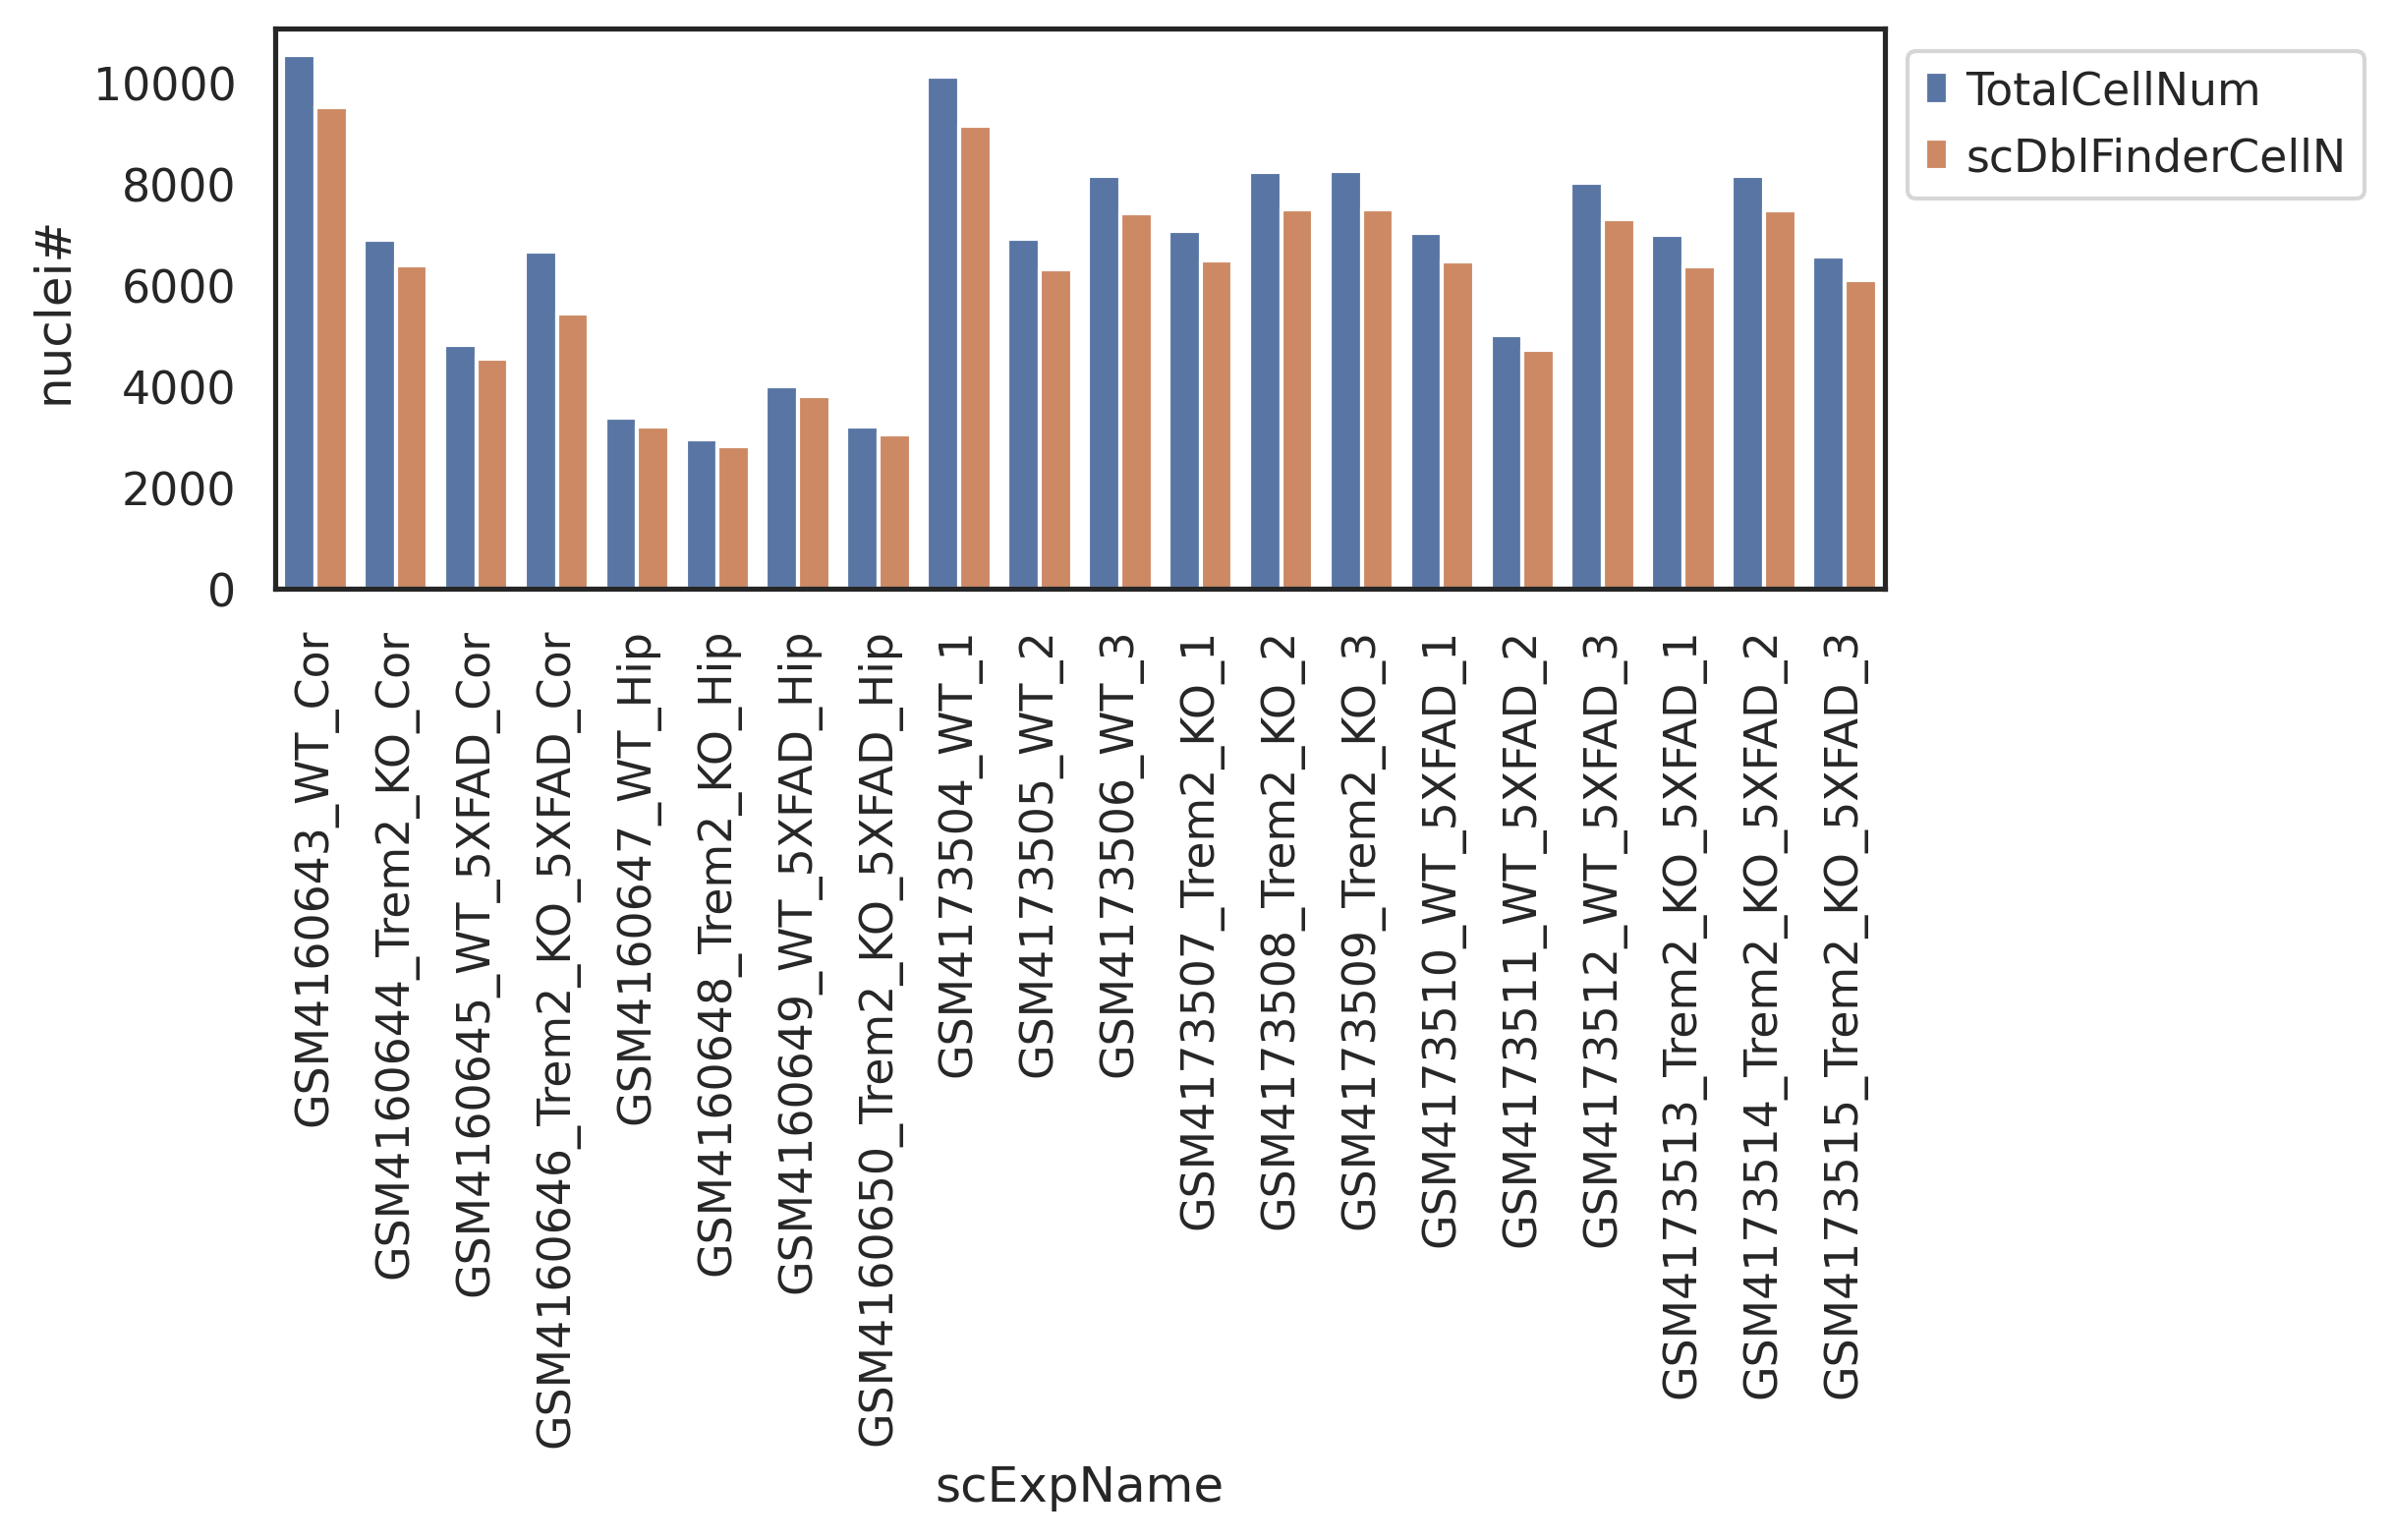

In [72]:
### decontx1-scruplet
with rc_context({'figure.figsize': (7, 2.5)}):
    sns.barplot(data=decontxSummaryDf_long, x='scExpName', y='nuclei#', hue='process')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.0, 1.0))